# CLI Tutorial

---

**GeoIPS Command Line Interface (CLI)**

**If you haven't installed Jupyter Notebook or aren't familiar with it, please follow the instructions linked [here](https://docs.jupyter.org/en/latest/install.html#jupyter-notebook-interface) before continuing.**

**If you don't have an environment already set up, please follow the steps 2 and 3 of the instructions linked [here](https://nrlmmd-geoips.github.io/geoips/getting-started/installing/index.html) based on the architecture of your machine.**

You can quit following the instructions after you've activated your geoips environment via ``conda activate geoips``

## Interrogation & Execution


The GeoIPS CLI ([documentation](https://nrlmmd-geoips.github.io/geoips/concepts/functionality/command-line/index.html#geoips)) is a high-level tool which improves the accessibility, flexibility, and control of GeoIPS.

It’s composed of two parts:

### Interrogation
- Search through GeoIPS and its corresponding plugin packages to see what exists.
- List GeoIPS artifacts (packages, plugins, interfaces, scripts, datasets, …)
- Description of artifacts

### Execution
- Run a GeoIPS processing workflow (procflow)
- Validate plugins
- Run GeoIPS tests
- Configuration of GeoIPS and its plugin packages


## Command: geoips tree


Expose all CLI commands in a tree-like fashion.

General Syntax:  
```
geoips tree <opt_args>
```

In [ ]:
%%bash

geoips tree --color

## CLI Help Messages


For any command ran via the CLI, you can request a help message.

To do so, all you have to do is:
```
geoips <command> <sub-command> <...> -h
```

This will output help text for the command being ran.  
Useful for a reminder or for new users of the CLI.

For example:


In [ ]:
%%bash

geoips -h

In [ ]:
%%bash

geoips describe -h

## CLI Aliases


You'll see from the previous commands that GeoIPS CLI has a variety of sub-commands. These commands are somewhat verbose; to improve ease of use, aliases for each command can be used to execute in shorthand style.


In [ ]:
%%bash

geoips describe reader abi_netcdf
geoips desc rdr abi_netcdf

In [ ]:
%%bash

geoips list product-defaults
geoips ls pdefs

In [ ]:
%%bash

geoips describe algorithm family xarray_dict_to_xarray
geoips desc alg fam xarray_dict_to_xarray

## Ensure your package is installed correctly


Use the CLI to check whether your package is installed correctly.

If you just have **geoips** and **geoips_clavrx** installed, you should see two rows that correspond to those packages. If any additional GeoIPS packages are installed, you should see those as well.

General Syntax:  
```
geoips list packages
```


In [ ]:
%%bash

geoips list packages

## Command: geoips list


List all reader plugins from GeoIPS & installed plugin packages.

If just **geoips** and **geoips_clavrx** are installed, you should see reader plugins contained in both of those packages.

General Syntax:  
```
geoips list <interface_name>
```


In [ ]:
%%bash

geoips list readers

## List plugins from a specific plugin package


List available plugins of a particular type from a specific plugin package.

General Syntax:  
```
geoips list <interface_name> -p <package_name>
```


In [ ]:
%%bash

# if geoips_clavrx is installed, you can run the command below. Same goes for any other geoips-based package
geoips list readers -p geoips_clavrx
# Otherwise, for clarity's sake, you can list reader plugins from a specific package via
# geoips list readers -p <installed_package_name>

## Command: geoips describe


Display additional information about a particular plugin.

General Syntax:  
```
geoips describe <interface_name> <plugin_name>
```


In [ ]:
%%bash

# Again, only run if the geoips_clavrx package is installed
geoips describe reader clavrx_hdf4
# Otherwise, run a command similar to what is shown below
# geoips describe reader <name_of_reader_in_installed_package>

## Command: geoips list products


List the products that GeoIPS can produce using a particular plugin package.

General Syntax:  
```
geoips list <interface_name> -p <package_name>
```


In [ ]:
%%bash

# Again, only run if the geoips_clavrx package is installed
geoips list products -p geoips_clavrx
# Otherwise, run a command similar to what is shown below
# geoips list products -p <installed_package_name>

## Command: geoips describe product


Display additional information about a particular product plugin.

Running this command describes ‘Cloud-Fraction’, including:
- What type of plugin it is
- Where it comes from
- What source supports this product

General Syntax:  
```
geoips describe <interface_name> <source_name>.<plugin_name>
```


In [ ]:
%%bash

# Again, only run if the geoips_clavrx package is installed
geoips describe product clavrx.Cloud-Fraction
# Otherwise, run a command similar to what is shown below
# geoips describe product <name_of_product_in_installed_package>

## Command: geoips config install


Install GeoIPS’ test datasets.

Running this command downloads and extracts test datasets from our nextcloud storage server.  
These test datasets are needed for various integration tests across GeoIPS and its plugin packages.

General Syntax:  
```
geoips config install <test_dataset_name> <test_dataset_name2> ...
```

To view what datasets are available for install, run:  
```
geoips list test-datasets
```


In [ ]:
%%bash

geoips config install test_data_abi

## Command: geoips run


GeoIPS is run by calling `geoips run`.

For repeatability, this can be put into a bash script (e.g. `abi.Cloud-Fraction.imagery_clean.sh`).

General Syntax:  
```
geoips run <procflow_name> <procflow_args>
```

For a listing of scripts available in core GeoIPS, see [here](https://github.com/NRLMMD-GEOIPS/geoips/tree/main/tests/scripts).

Note that you'll need to have the corresponding test data installed for these scripts to work.


In [ ]:

%%bash

geoips run single_source \
$GEOIPS_TESTDATA_DIR/test_data_abi/data/goes16_20200918_1950/*.nc \
   --reader_name abi_netcdf \
   --product_name Infrared \
   --output_formatter imagery_clean \
   --sector_list conus

# Feel free to replace the contents of this code section with a test script that
# native GeoIPS supports


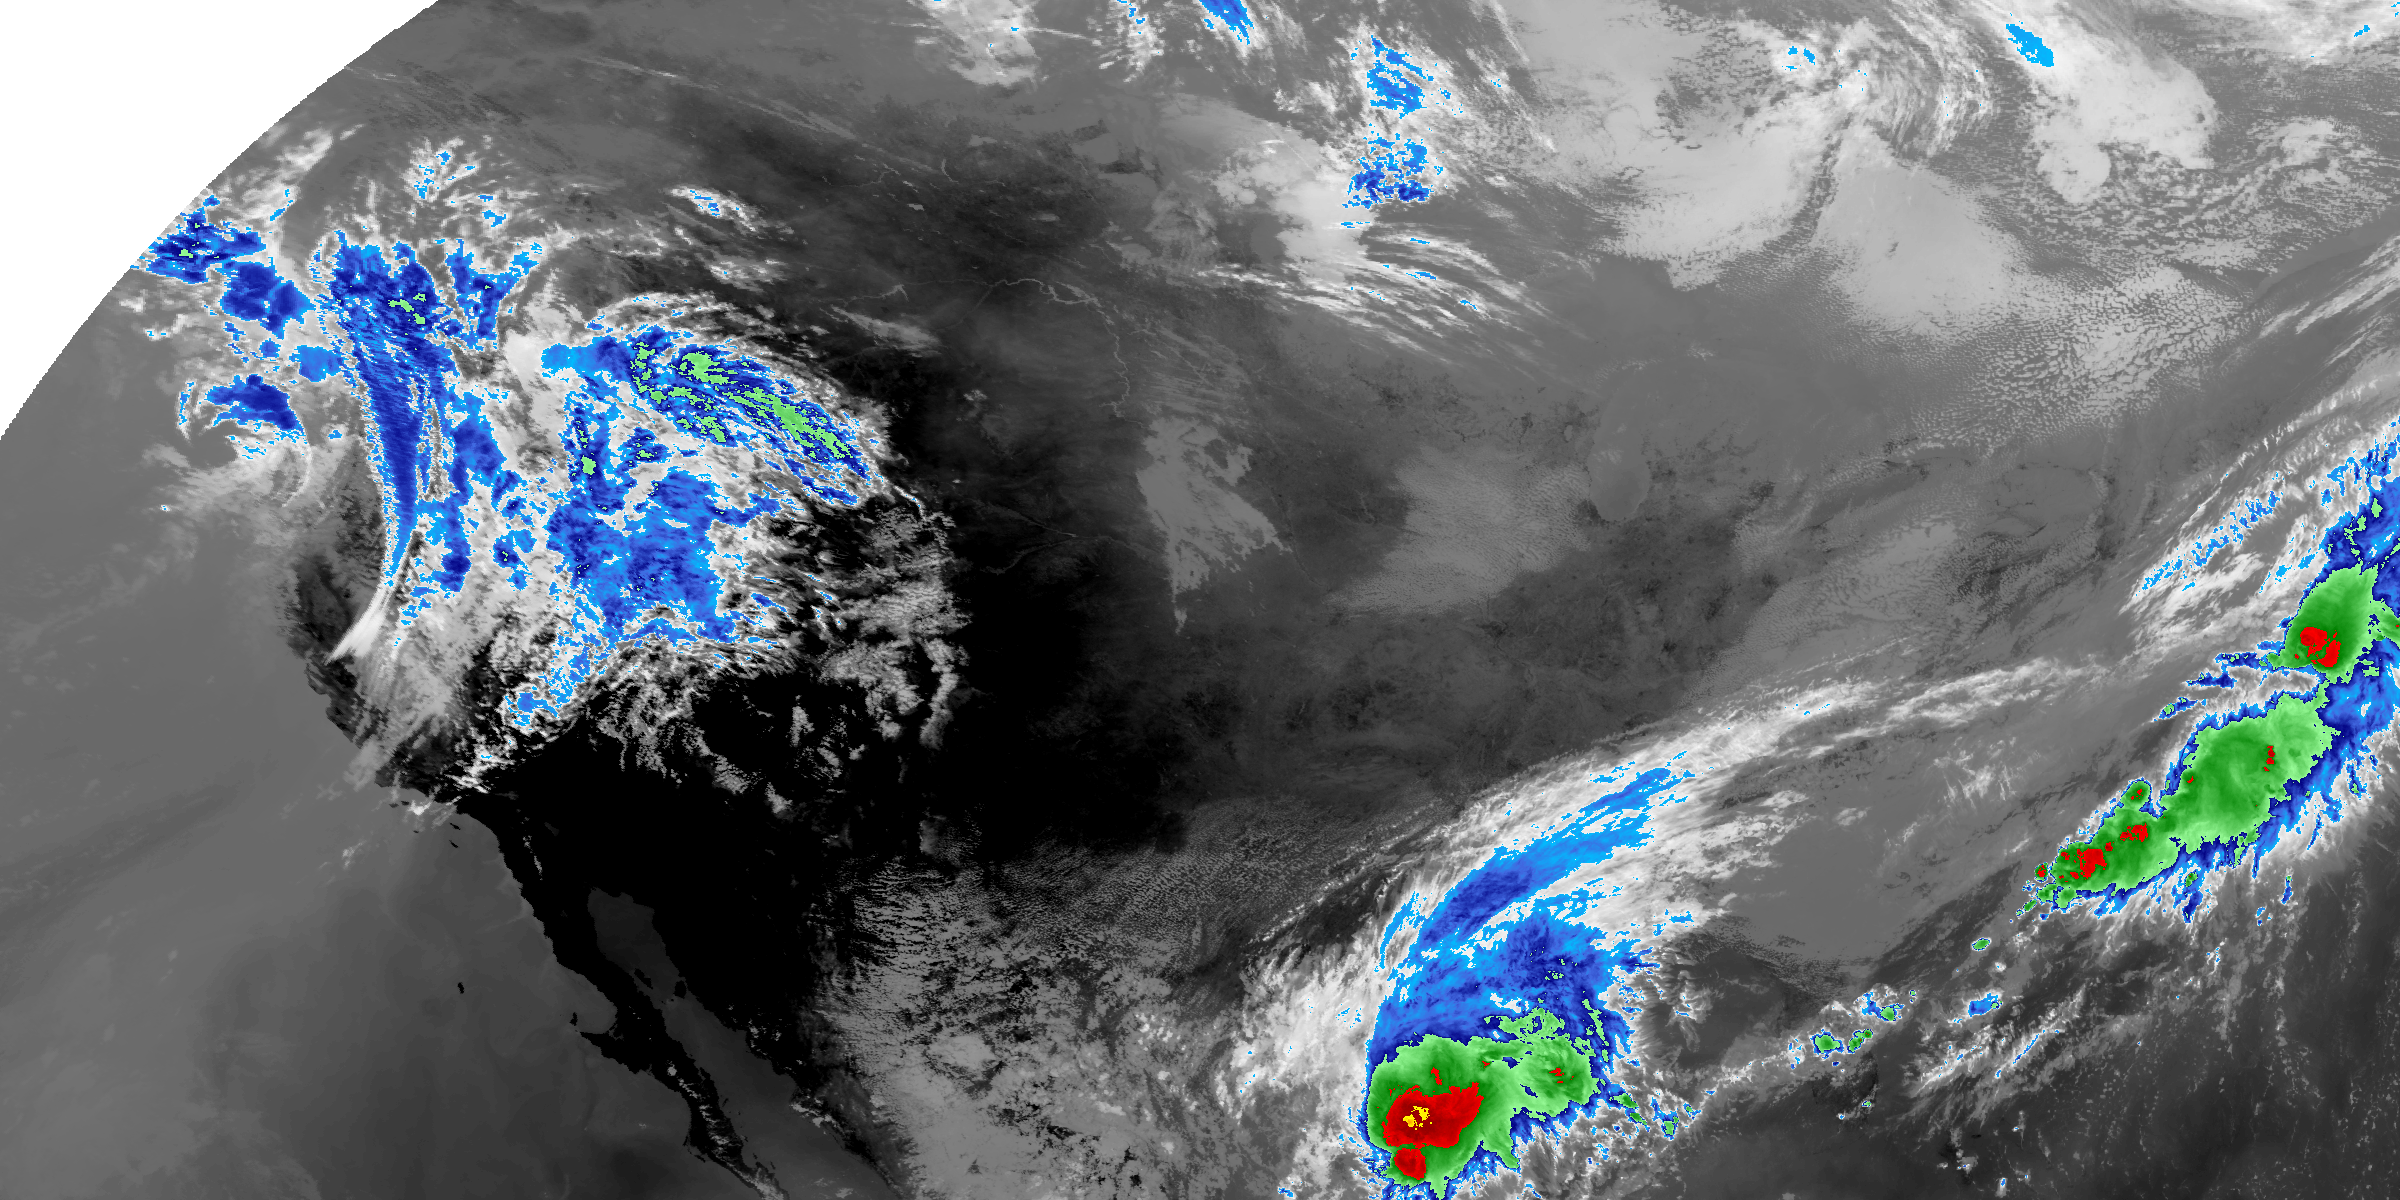

In [3]:
import os
from IPython.display import Image

# Provide the path to your PNG file
Image(f"{os.environ['GEOIPS_OUTDIRS']}/preprocessed/annotated_imagery/NorthAmerica-UnitedStates-Continental/x-x-x/Infrared/abi/20200918.195020.goes-16.abi.Infrared.conus.97p12.noaa.3p0.png")

## Command: geoips test sector


Produce a ‘test sector image’.

Running this command produces a test sector image from the ‘canada’ sector plugin.  
This is an easy method to view what geospatial domain a sector you’ve created captures.

General Syntax:  
```
geoips test sector <sector_name>
```


In [1]:
%%bash

export CARTOPY_DATA_DIR=$HOME/cartopy

echo $CARTOPY_DATA_DIR

geoips test sector canada

/home/evan/cartopy
Creating /home/evan/geoips/geoips_packages/outdirs/canada.png.

Until this warning is removed, do not rely on the CLI to be static.
Please feel free to test the CLI and report any bugs or comments as an issue here:
https://github.com/NRLMMD-GEOIPS/geoips/issues/new/choose



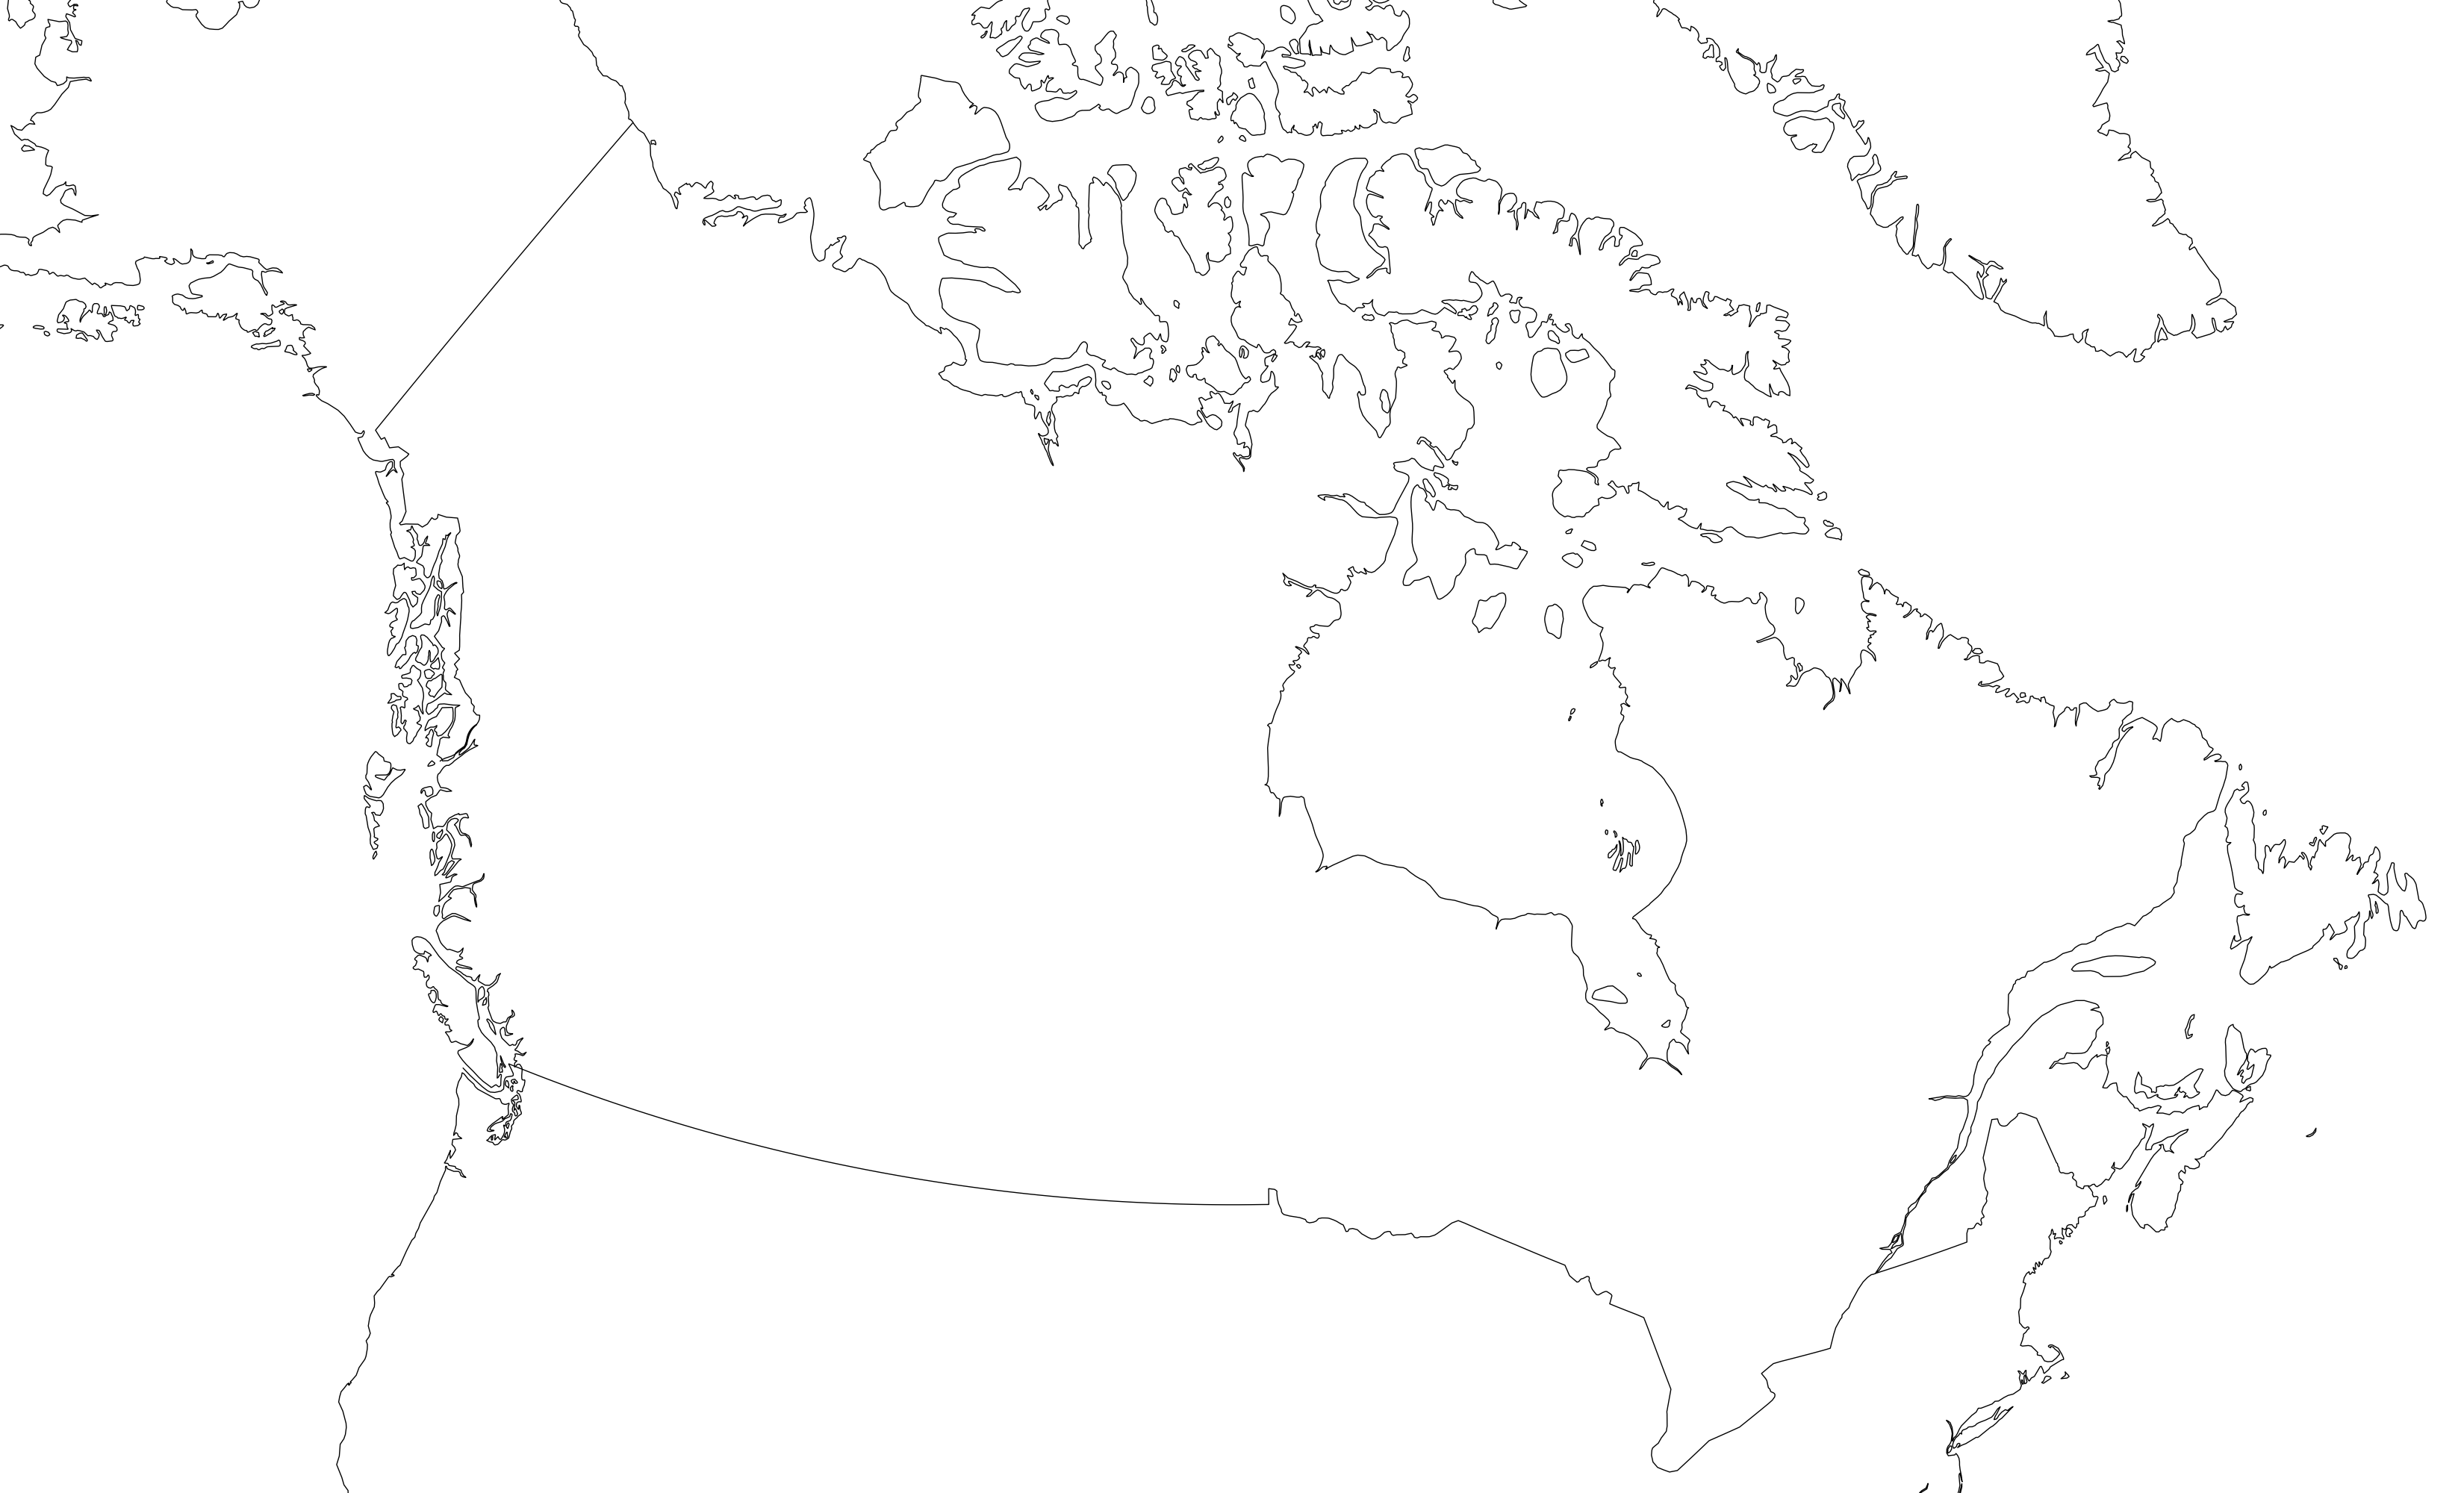

In [4]:
Image(f"{os.environ['GEOIPS_OUTDIRS']}/canada.png")

In [ ]:
%%bash

export CARTOPY_DATA_DIR=$HOME/cartopy

echo $CARTOPY_DATA_DIR

geoips test sector canada --overlay
geoips test sector -h

In [ ]:
Image(f"{os.environ['GEOIPS_OUTDIRS']}/canada.png")

## Command: geoips config create/delete registries


Create or delete plugin registries.

Running either of these commands will create or delete plugin registries.  
These files are needed for GeoIPS to be able to dynamically locate a plugin at runtime.

General Syntax:
```
geoips config create-registries -n <namespace> -p <package_names> -s <save_type>
geoips config delete-registries -n <namespace> -p <package_names>
```

Note: Registries are automatically created if a plugin is missing at runtime.  
You can disable this by adding the following line in your `.bashrc`:
```
export GEOIPS_REBUILD_REGISTRIES="False"
```


In [ ]:
%%bash

geoips config create-registries
# geoips config delete-registries
